In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\karth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
customers_path = r"C:\Users\karth\Downloads\Customers.csv"
products_path = r"C:\Users\karth\Downloads\Products.csv"
transactions_path = r"C:\Users\karth\Downloads\Transactions.csv"

In [3]:
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

In [4]:
print("Customers Dataset:")
display(customers_df.head())

print("Products Dataset:")
display(products_df.head())

print("Transactions Dataset:")
display(transactions_df.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
print("Missing values in Customers dataset:")
print(customers_df.isnull().sum())
print("\nMissing values in Products dataset:")
print(products_df.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions_df.isnull().sum())

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
print("\nDuplicate rows in Customers dataset:", customers_df.duplicated().sum())
print("Duplicate rows in Products dataset:", products_df.duplicated().sum())
print("Duplicate rows in Transactions dataset:", transactions_df.duplicated().sum())


Duplicate rows in Customers dataset: 0
Duplicate rows in Products dataset: 0
Duplicate rows in Transactions dataset: 0


In [7]:
print("Numerical summary - Transactions:")
display(transactions_df.describe())


print("\nCustomer Regions:")
print(customers_df['Region'].value_counts())

print("\nProduct Categories:")
print(products_df['Category'].value_counts())

Numerical summary - Transactions:


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000



Customer Regions:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Product Categories:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


# Data Visualization

Distribution of customers by region 

C:\Users\karth\AppData\Local\Temp\ipykernel_20988\947780445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', palette='viridis')


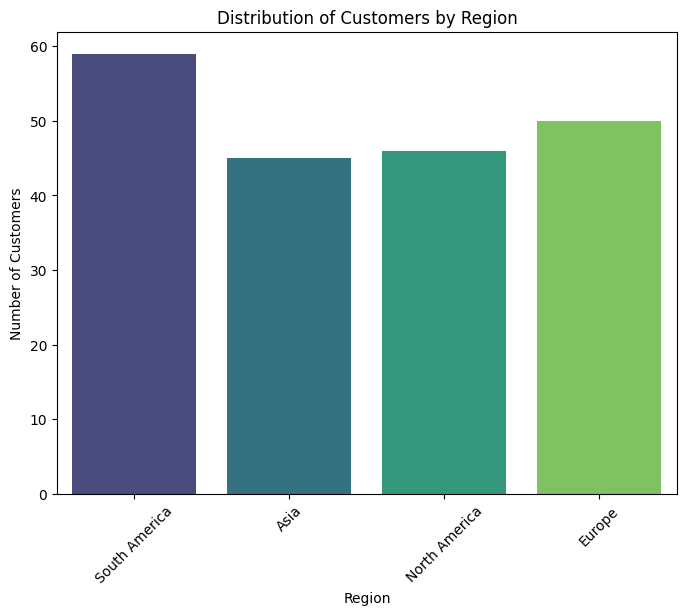

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Region', palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Popular Product

C:\Users\karth\AppData\Local\Temp\ipykernel_20988\2558405279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x='Category', palette='coolwarm')


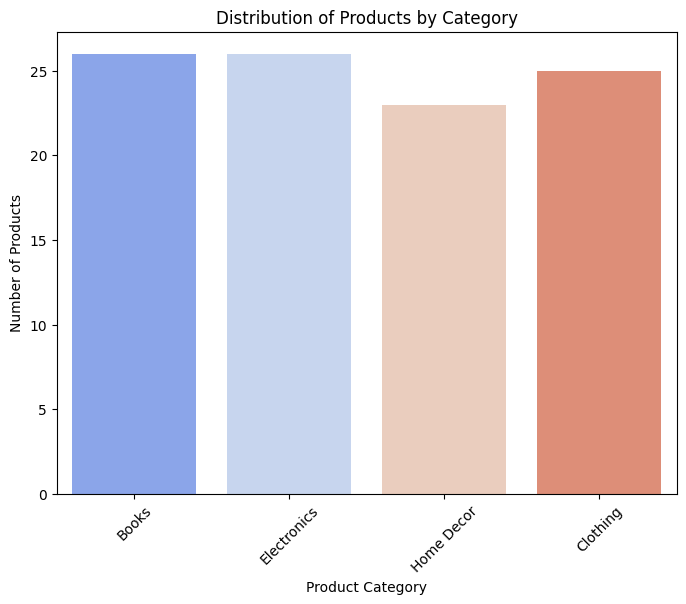

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=products_df, x='Category', palette='coolwarm')
plt.title('Distribution of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

Transaction Trends Over Time

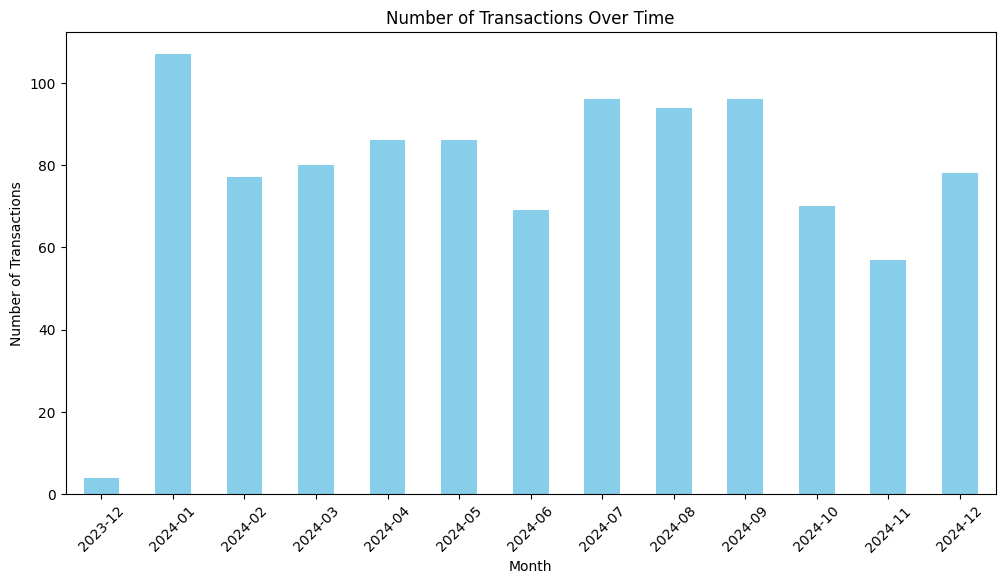

In [10]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


plt.figure(figsize=(12, 6))
transactions_df['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()